In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raw_data = np.genfromtxt('https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt', skip_header=36)

In [ ]:
raw_data

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs)
ax.view_init(15,15)
plt.show()

In [ ]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

In [ ]:
y_data.shape

In [ ]:
x_data.shape

## y_data reshape를 왜 하는가?
Y = (피처 * 가중치) + b</br>
x_data = 피처, W = 가중치</br>
(피처 * 가중치) = (25,1) 그러나 y_data는 현재 (25,)이기 때문에 형태를 맞춰야한다.

In [ ]:
y_data = y_data.reshape((25,1))

In [ ]:
y_data.shape

In [ ]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,)),
])

model.compile(optimizer = 'rmsprop', loss='mse')

In [ ]:
model.summary()

In [ ]:
hist = model.fit(x_data, y_data, epochs=10)

In [ ]:
hist = model.fit(x_data, y_data, epochs=5000)

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
model.predict(np.array([100,44]).reshape(1,2))

In [ ]:
W_, b = model.get_weights()
W_,b

In [ ]:
x = np.linspace(20,100, 50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)

X = np.concatenate((x,y),axis=1)
Z = np.matmul(X,W_)+b

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)
ax.scatter(x,y,Z)

# XOR

In [50]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([[0], [1], [1], [0]])

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [52]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss = 'mse')

In [53]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 [==============================] - 1s 2ms/step - loss: 0.2744
Epoch 2/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2718
Epoch 3/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2696
Epoch 4/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2677
Epoch 5/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2658
Epoch 6/5000
4/4 [==============================] - 0s 5ms/step - loss: 0.2640
Epoch 7/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2625
Epoch 8/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2614
Epoch 9/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2605
Epoch 10/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2596
Epoch 11/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2590
Epoch 12/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.2584
Epoch 13/5000
4/4 [==============================

In [54]:
model.predict(X)

1/1 [==============================] - 0s 78ms/step


array([[0.05335028],
       [0.9515213 ],
       [0.9514425 ],
       [0.05188433]], dtype=float32)

In [55]:
plt.plot(hist.history['loss'])

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y),1))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [6]:
enc.categories_

[array([0, 1, 2])]

In [7]:
y_onehot = enc.transform(y.reshape(len(y),1))

In [8]:
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=52)

In [12]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

2023-02-23 20:54:45.712838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 20:55:01.181519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### OUTPUT activation 설정은???
1. 이게 얼마야?? -> 그냥 value
2. 맞아?? 틀려?? (2진 분류) -> sigmoid
3. 그래서 어떤 종류인데 (다중 분류) -> softmax

In [13]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 7ms/step - loss: 1.4758 - accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.2614 - accuracy: 0.3417
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 1.1075 - accuracy: 0.3417
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0203 - accuracy: 0.2500
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9346 - accuracy: 0.6083
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8585 - accuracy: 0.6583
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7915 - accuracy: 0.6333
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7412 - accuracy: 0.7000
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.7000
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6532 - accuracy: 0.7000
Epoch 11/100
4/4 [=========

In [16]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1312 - accuracy: 0.9667 - 236ms/epoch - 236ms/step


[0.13122449815273285, 0.9666666388511658]

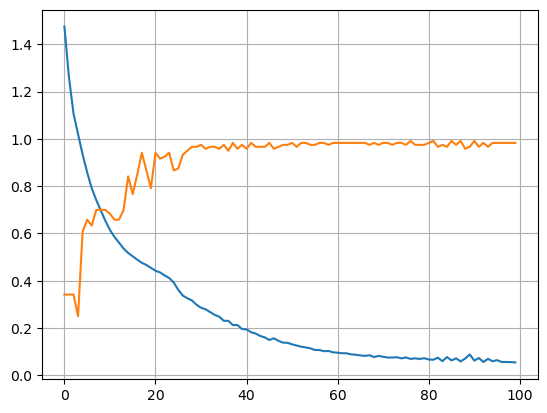

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.grid()